# Import Library

In [1]:
import numpy as np
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from numpy import mean
from numpy import absolute
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.impute import KNNImputer
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.datasets import make_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Dataset

In [2]:
data = pd.read_excel("trainDataset.xls")
data.shape

(400, 120)

In [3]:
data.head()

,ID,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1,144.0,41.0,0,0,0,1,3,3,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,TRG002178,0,142.0,39.0,1,1,0,0,3,3,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,TRG002204,1,135.0,31.0,0,0,0,1,2,1,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,TRG002206,0,12.0,35.0,0,0,0,1,3,3,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,TRG002210,0,109.0,61.0,1,0,0,0,2,1,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


In [4]:
data.describe()

,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,...,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000
mean,12.727500,56.159792,51.851171,0.540000,2.900000,2.81000,2.830000,9.880000,6.577500,8.625000,...,3.945420e-01,3.899257e-01,2.711993e+00,0.003314,5.683152e+07,176.969142,32500.032680,0.056721,0.005948,0.029385
std,111.104111,26.763774,10.864462,0.499022,49.932235,49.93649,49.935558,86.092482,70.443308,86.200962,...,1.674769e-01,1.624792e-01,7.556631e-01,0.002412,7.063822e+08,1045.305721,177545.921557,0.047363,0.008416,0.115909
min,0.000000,5.000000,23.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000,...,7.050000e-11,7.050000e-11,-3.200000e-16,0.000008,0.000000e+00,0.000000,0.000248,0.000000,0.000000,0.000000
25%,0.000000,38.000000,44.616016,0.000000,0.000000,0.00000,0.000000,2.000000,1.000000,1.000000,...,3.199017e-01,3.175584e-01,2.330664e+00,0.001334,1.078546e+06,18.628013,0.001851,0.018628,0.000310,0.001535
50%,0.000000,55.041667,51.119781,1.000000,0.000000,0.00000,0.000000,2.000000,1.000000,1.000000,...,4.095627e-01,4.054695e-01,2.807355e+00,0.002888,3.366594e+06,66.507214,0.004399,0.047029,0.002301,0.003384
75%,1.000000,73.000000,60.000000,1.000000,1.000000,1.00000,1.000000,3.000000,2.000000,1.000000,...,5.000660e-01,4.962633e-01,3.277613e+00,0.004707,9.231697e+06,154.300334,0.013846,0.084418,0.007873,0.009558
max,999.000000,144.000000,79.603012,1.000000,999.000000,999.00000,999.000000,999.000000,999.000000,999.000000,...,8.773779e-01,8.571429e-01,4.947427e+00,0.011301,1.390001e+10,20764.693790,1000000.000000,0.285100,0.060742,1.145601


# Drop Unused Column

In [5]:
data = data.drop(['ID','pCR (outcome)'], axis = 1)

# Replace 999 with Nan

In [6]:
data = data.replace(999, np.nan)

In [7]:
data.isnull()

,RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
#show the amount of null values in each column
pd.options.display.min_rows = 115
data.isnull().sum()

RelapseFreeSurvival (outcome)                      0
Age                                                0
ER                                                 0
PgR                                                1
HER2                                               1
TrippleNegative                                    1
ChemoGrade                                         3
Proliferation                                      2
HistologyType                                      3
LNStatus                                           1
TumourStage                                        0
original_shape_Elongation                          0
original_shape_Flatness                            0
original_shape_LeastAxisLength                     0
original_shape_MajorAxisLength                     0
original_shape_Maximum2DDiameterColumn             0
original_shape_Maximum2DDiameterRow                0
original_shape_Maximum2DDiameterSlice              0
original_shape_Maximum3DDiameter              

In [9]:
#total amount of null values
data.isnull().sum().sum()

12

In [10]:
#Fill in the null values using KNNImputer
knnimputer = KNNImputer(n_neighbors=5)
data.iloc[:,:] = knnimputer.fit_transform(data)
# data.to_excel('KNNImputer.xlsx')

# Fill in the null values using KNNImputer

In [11]:
knnimputer = KNNImputer(n_neighbors=5)
data.iloc[:,:] = knnimputer.fit_transform(data)
# data.to_excel('KNNImputer.xlsx')

# Define x and y

In [12]:
#define x by removing the column of 'RelapseFreeSurvival (outcome)' 
x = data.drop(['RelapseFreeSurvival (outcome)'], axis = 1)

#define y by keeping the column of 'RelapseFreeSurvival (outcome)' 
y = data['RelapseFreeSurvival (outcome)']

# Sequential Backward Selection

In [13]:
cv = KFold(n_splits=10, random_state = 1, shuffle = True)
regressor_pipeline = make_pipeline(StandardScaler(),Ridge(alpha = 0.1, random_state=1))

In [14]:
sfs1 = SFS(regressor_pipeline,
          k_features = 1,
          forward = False,
          scoring='neg_mean_absolute_error',
          cv=cv,
          n_jobs = -1)

sfs1.fit(x,y)

SequentialFeatureSelector(cv=KFold(n_splits=10, random_state=1, shuffle=True),
                          estimator=Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('ridge',
                                                     Ridge(alpha=0.1,
                                                           random_state=1))]),
                          forward=False, k_features=(1, 1), n_jobs=-1,
                          scoring='neg_mean_absolute_error')

In [15]:
# Show the average of MAE for each combination of feature
sfs1.subsets_

{117: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   98,
   99,
   100,
   101,
   102,
   103,
   104,
   105,
   106,
   107,
   108,
   109,
   110,
   111,
   112,
   113,
   114,
   115,
   116),
  'cv_scores': array([-22.13547608, -25.21127571, -20.48417501, -27.45159342,
         -18.73812819, -80.74503182, -85.93837021, -21.07065124,
         -

In [16]:
#Make a dataframe for the average MAE of every combination
results = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

#The process of converting series into list
pd.options.display.max_colwidth = 10000
maxvalue = results['avg_score'].max()

r = results[results['avg_score']==maxvalue]
r=r.iloc[-1:]
featureNames = r['feature_names'].to_string()

featureNames = featureNames.split(' ', 1)[-1]
featureNames = featureNames.replace('(', '')
featureNames = featureNames.replace(')', '')
featureNames = featureNames.replace(' ', '')

List=featureNames.split(',')
print(List)
# print(len(List))

['TumourStage', 'original_shape_Elongation', 'original_shape_Flatness', 'original_shape_MajorAxisLength', 'original_shape_MinorAxisLength', 'original_shape_Sphericity', 'original_shape_SurfaceVolumeRatio', 'original_firstorder_10Percentile', 'original_firstorder_InterquartileRange', 'original_firstorder_RobustMeanAbsoluteDeviation', 'original_firstorder_Skewness', 'original_gldm_DependenceVariance', 'original_gldm_LargeDependenceEmphasis', 'original_gldm_SmallDependenceEmphasis', 'original_gldm_SmallDependenceHighGrayLevelEmphasis', 'original_glrlm_GrayLevelNonUniformity', 'original_glrlm_LongRunHighGrayLevelEmphasis', 'original_glrlm_LowGrayLevelRunEmphasis', 'original_glrlm_RunLengthNonUniformity', 'original_glrlm_RunVariance', 'original_glrlm_ShortRunEmphasis', 'original_glrlm_ShortRunLowGrayLevelEmphasis', 'original_glszm_GrayLevelNonUniformity', 'original_glszm_GrayLevelNonUniformityNormalized', 'original_glszm_LargeAreaHighGrayLevelEmphasis', 'original_glszm_LowGrayLevelZoneEmpha

In [17]:
# Dropt the unrelated column to get the best features
X = data.drop(columns = 'RelapseFreeSurvival (outcome)')[List]

In [18]:
# Determine the shape of the column left
X.shape

(400, 33)

# Split Dataset into Test and Training Set

In [19]:
Xs_train, Xs_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Hyperparameter Optimisation

In [20]:
from sklearn.pipeline import Pipeline

In [21]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('Ridge', Ridge(random_state=1))])

In [22]:
param_grid = {
    'Ridge__alpha': [0.1,1,10,100]
}

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
gs = GridSearchCV(pipe, 
                  param_grid=param_grid, 
                  scoring='neg_mean_absolute_error', 
                  n_jobs=-1, 
                  cv=cv,
                  refit=False)

In [25]:
gs.fit(X,y)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('Ridge', Ridge(random_state=1))]),
             n_jobs=-1, param_grid={'Ridge__alpha': [0.1, 1, 10, 100]},
             refit=False, scoring='neg_mean_absolute_error')

In [26]:
print("Best parameters via GridSearch", gs.best_params_)

Best parameters via GridSearch {'Ridge__alpha': 0.1}


In [27]:
optimised_model = pipe.set_params(**gs.best_params_).fit(Xs_train, y_train)

Using K-fold Cross Validation to determine the Result of Model with Optimised Hyperparameter 

In [28]:
#K-Fold R2 Score
r2_scores = cross_val_score(optimised_model, X, y, scoring='r2', cv=cv, n_jobs=-1)
print("K-Fold R2 score =", round(mean(r2_scores),2))

K-Fold R2 score = 0.09


In [29]:
#K-Fold Mean Squared Error 
MSE = cross_val_score(optimised_model, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("K-Fold Mean Squared Error =", round(mean(absolute(MSE)),2))

K-Fold Mean Squared Error = 641.38


In [30]:
#K-Fold Root Mean Squared Error 
MSE = cross_val_score(optimised_model, X, y, scoring='neg_root_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("K-Fold Root Mean Squared Error =", round(mean(absolute(MSE)),2))

K-Fold Root Mean Squared Error = 25.13


In [31]:
#K-Fold Mean Absolute Error 
MAE = cross_val_score(optimised_model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
print("K-Fold Mean Absolute Error =", round(mean(absolute(MAE)),2))

K-Fold Mean Absolute Error = 19.38


# Difference between prediction set and test set

In [32]:
y_pred = optimised_model.predict(Xs_test)

In [33]:
# Compare the difference between the predicted value and actual value
pred_data = pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Difference':y_test-y_pred})

print(pred_data)

         Actual  Predicted  Difference
398   46.916667  66.012956  -19.096289
125   45.000000  46.014642   -1.014642
328   31.000000  40.833902   -9.833902
339   75.583333  56.233826   19.349507
172   13.000000  42.367795  -29.367795
342   73.166667  62.987206   10.179461
197   57.000000  54.645564    2.354436
291   37.000000  34.501530    2.498470
29   105.000000  70.909434   34.090566
284   40.000000  65.345416  -25.345416
174   36.000000  64.483252  -28.483252
372   58.416667  37.636757   20.779909
188   58.000000  47.386936   10.613064
324   35.000000  56.232962  -21.232962
321   31.000000  41.273371  -10.273371
227   50.000000  48.915966    1.084034
371   59.000000  60.824474   -1.824474
5    135.000000  63.837647   71.162353
78    87.000000  60.717657   26.282343
223   50.000000  52.485582   -2.485582
122   74.000000  64.827025    9.172975
242   45.000000  48.054884   -3.054884
382   56.250000  54.463977    1.786023
214   53.000000  54.792900   -1.792900
17    20.000000  59.04111

# Plot the graph of actual and predicted diagram to visualize

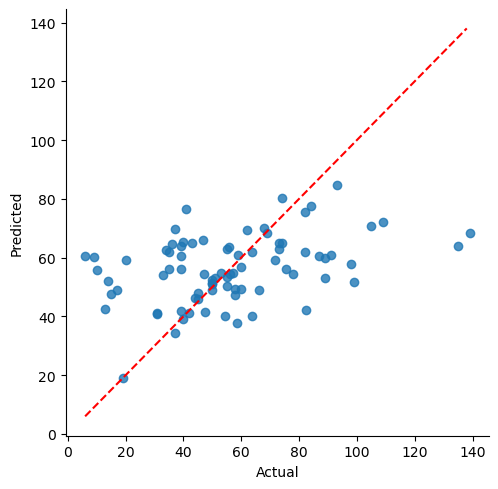

In [34]:
data_results = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
sns.lmplot(x='Actual',y='Predicted',data=data_results,fit_reg=False)
d_line= np.arange(data_results.min().min(), data_results.max().max())
plt.plot(d_line, d_line, color='red', linestyle='--')
plt.show()